# Diabetes Prediction Model
## Roll no: A45
## Sub: Data Analytics

In [14]:
# All the imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [170]:
data = pd.read_csv("train.csv")

In [171]:
data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [172]:
data.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


### Lets check if there are any empty cells

In [173]:
data.isna().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

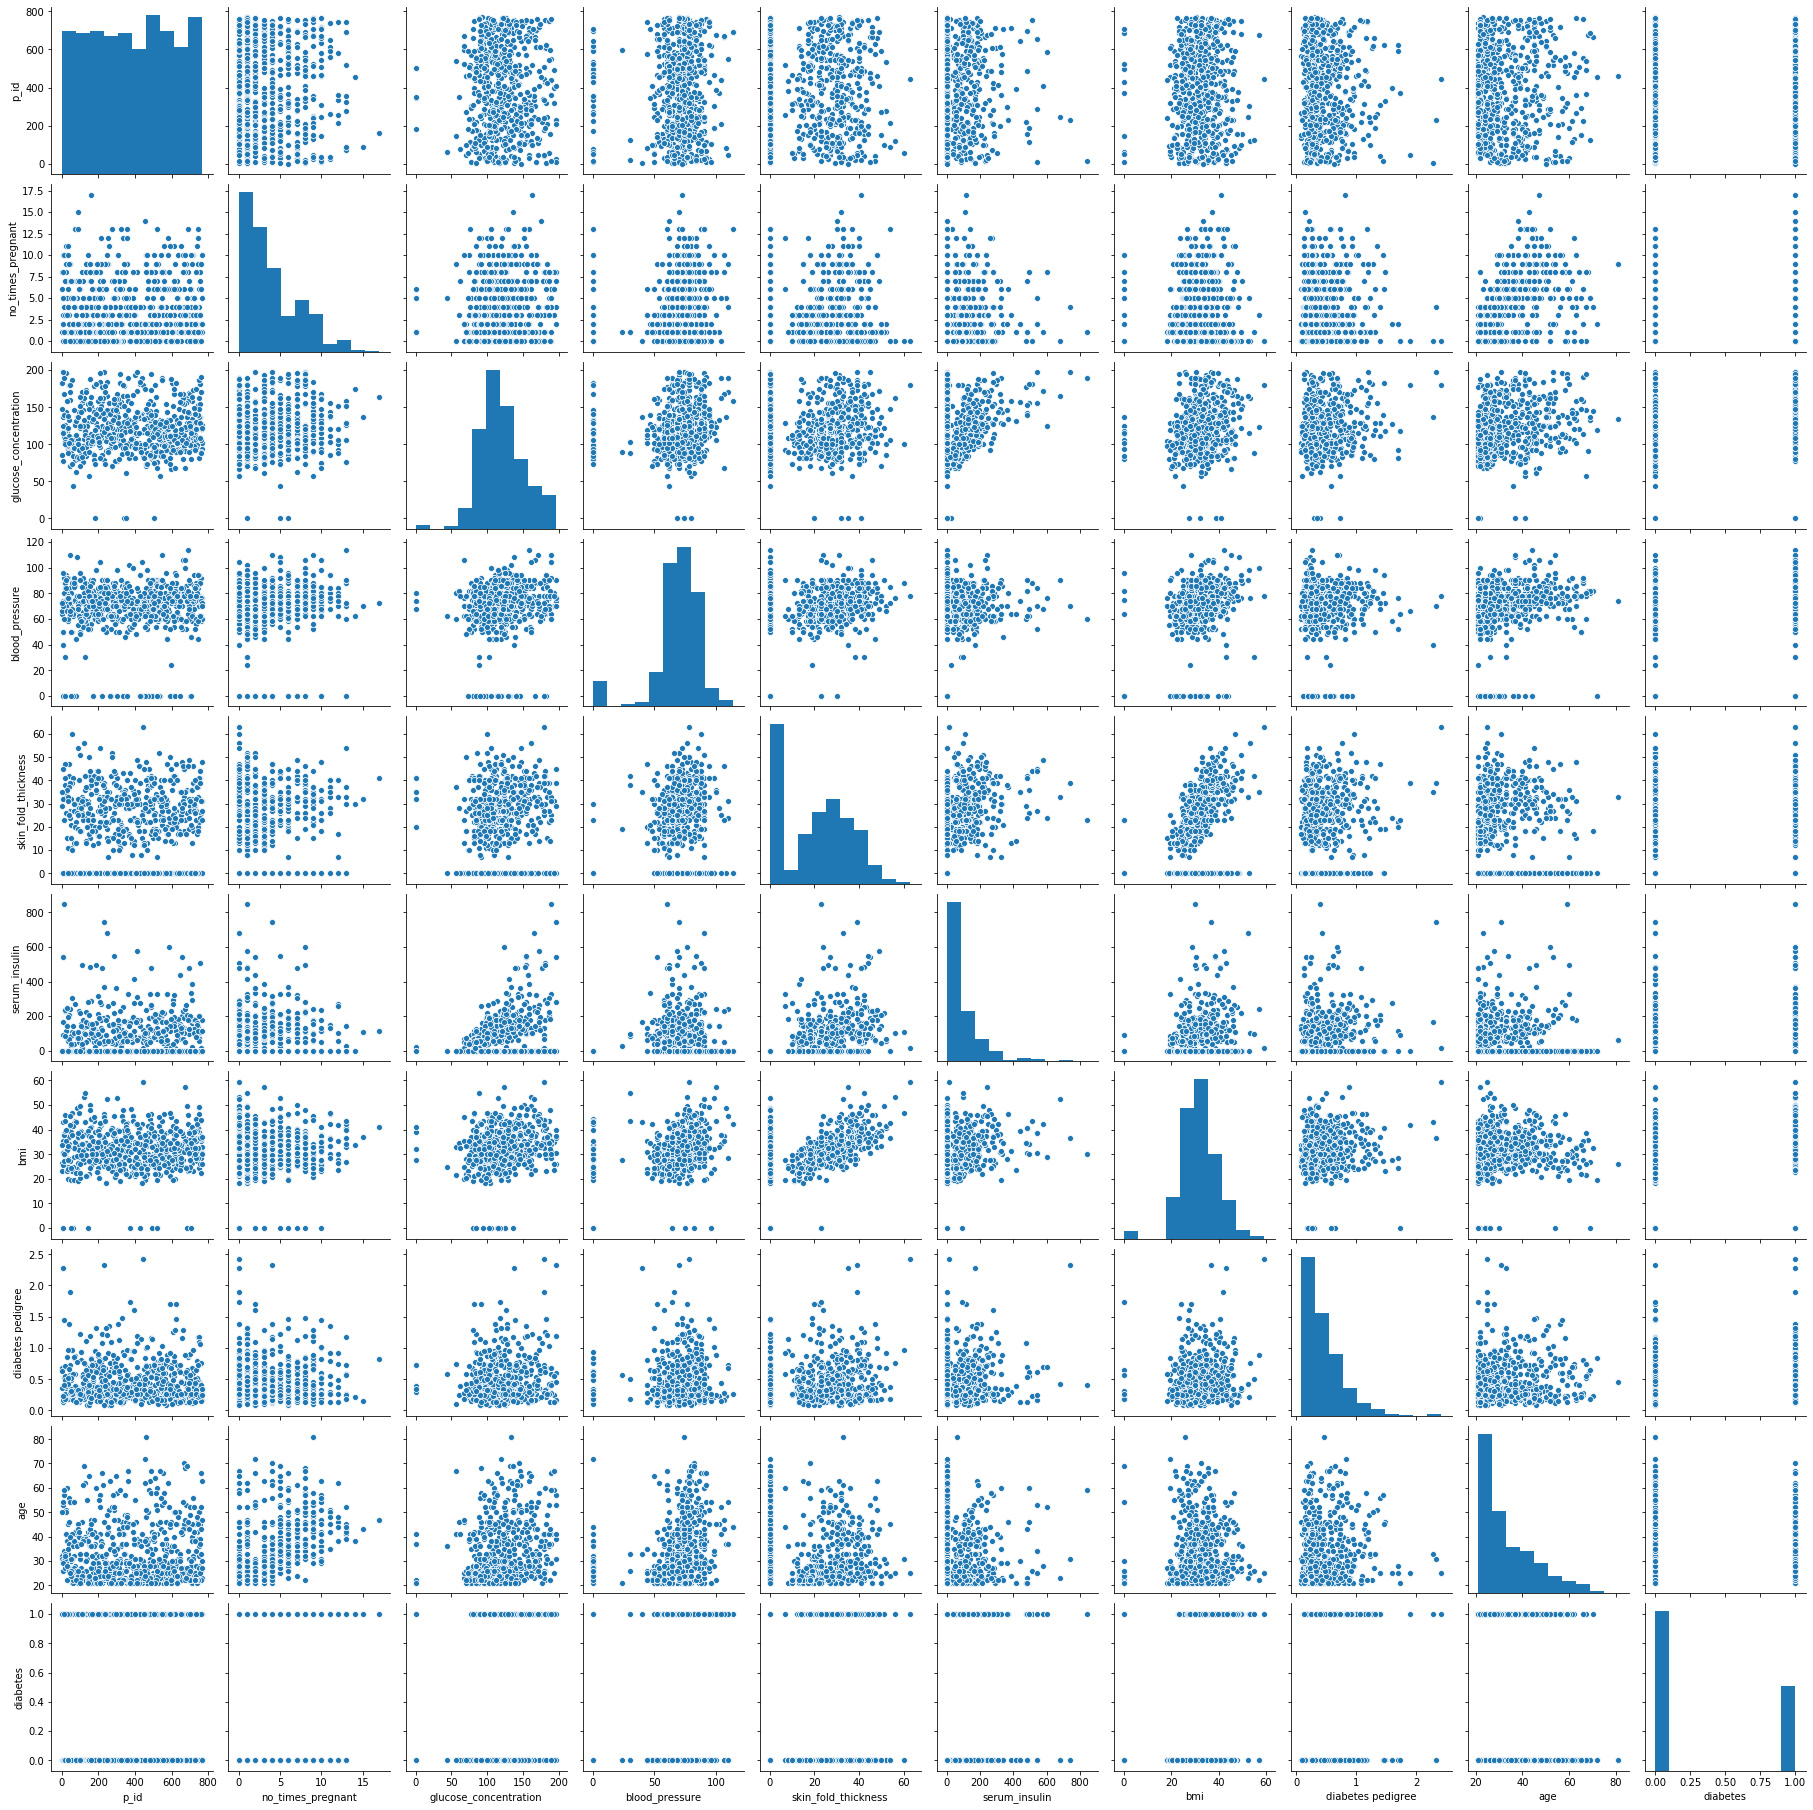

In [174]:
sns.pairplot(data)

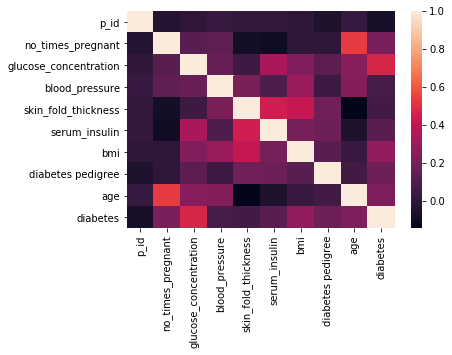

In [175]:
# Checking the correlation between the values
sns.heatmap(data.corr())

## Splitting the data  : Common to all models

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [177]:
x = data.drop(['diabetes'],axis=1)
y = data['diabetes']

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

## Training Model-1 : Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
y_predicted = model_logistic.predict(x_test)

In [182]:
from sklearn import metrics

In [183]:
model1_accuracy = metrics.accuracy_score(y_test, y_predicted)
model1_accuracy

0.8216216216216217

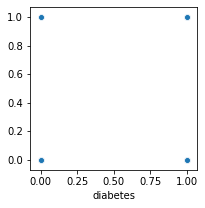

In [184]:
plt.figure(figsize=(3,3))
sns.scatterplot(x=y_test, y=y_predicted, data=data)

In [185]:
confusion_matrix(y_test, y_predicted)

array([[118,   2],
       [ 31,  34]], dtype=int64)

In [186]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       120
           1       0.94      0.52      0.67        65

    accuracy                           0.82       185
   macro avg       0.87      0.75      0.78       185
weighted avg       0.85      0.82      0.81       185



## Train Model-2 : KNN

In [187]:
from sklearn.neighbors import KNeighborsClassifier

In [188]:
model_knn = KNeighborsClassifier(n_neighbors=1)

In [189]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [190]:
y_predicted = model_knn.predict(x_test)

In [191]:
model2_accuracy = metrics.accuracy_score(y_test, y_predicted)
model2_accuracy

0.6486486486486487

In [192]:
confusion_matrix(y_test, y_predicted)

array([[87, 33],
       [32, 33]], dtype=int64)

In [193]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       120
           1       0.50      0.51      0.50        65

    accuracy                           0.65       185
   macro avg       0.62      0.62      0.62       185
weighted avg       0.65      0.65      0.65       185



## Train Model-3 : Decision Tree

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
model_dt = DecisionTreeClassifier()

In [196]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [197]:
y_predicted = model_dt.predict(x_test)

In [198]:
model3_accuracy = metrics.accuracy_score(y_test, y_predicted)
model3_accuracy

0.7081081081081081

In [199]:
confusion_matrix(y_test, y_predicted)

array([[98, 22],
       [32, 33]], dtype=int64)

In [200]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       120
           1       0.60      0.51      0.55        65

    accuracy                           0.71       185
   macro avg       0.68      0.66      0.67       185
weighted avg       0.70      0.71      0.70       185



## Train Model-4 : Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
model_rfc = RandomForestClassifier(n_estimators=40)

In [213]:
model_rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
y_predicted = model_rfc.predict(X_test)

In [215]:
model4_accuracy = metrics.accuracy_score(y_test, y_predicted)
model4_accuracy

0.4810810810810811

In [216]:
confusion_matrix(y_test, y_predicted)

array([[73, 47],
       [49, 16]], dtype=int64)

In [210]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       120
           1       0.29      0.29      0.29        65

    accuracy                           0.50       185
   macro avg       0.45      0.45      0.45       185
weighted avg       0.50      0.50      0.50       185



## Final Comparision of the accuracies

In [211]:
print("1. Logistic Regression : ", model1_accuracy)
print("2. K Nearest Neighbours : ", model2_accuracy)
print("3. Decision Tree : ", model3_accuracy)
print("4. Random Forest : ", model4_accuracy)

1. Logistic Regression :  0.8216216216216217
2. K Nearest Neighbours :  0.6486486486486487
3. Decision Tree :  0.7081081081081081
4. Random Forest :  0.4972972972972973


# Conclusion: Logistic Regression is a better choice for this problem

# ----------------------------------------- END ----------------------------------------- #